# **배달 데이터 분석 및 EDA**
---


## **프로젝트 Summary**
---

> **프로젝트명**

```
▶ 배달 데이터 분석 및 EDA
```  

> **프로젝트유형**

```
▶ 배달 데이터 활용 EDA 및 인사이트 도출

```



## **문제상황 Introduction**
---

> **문제정의**

```
▶ 배달 서비스의 품질 향상과 고객만족도 개선을 위한 자사 서비스 데이터 분석
```  

> **기대효과**

```
▶ 서비스의 품질 향상을 통해 시장 점유율 증가 및 효율적인 서비스 운영
```

> **해결방안**

```
▶ 배달 시간, 음식 종류, 주문 비용 등과 고객 평점의 관계 분석 및 인사이트 추출
```


> **데이터 살펴보기**


|Column|Description|
|:---|:---|
|order_id|주문의 고유 ID|
|customer_id|음식을 주문한 고객의 ID|
|restaurant_name|레스토랑 이름|
|cuisine_type|고객이 주문한 요리 유형|
|cost_of_the_order|주문 비용|
|day_of_the_week|주문이 평일인지 주말인지를 나타냄 (평일은 월요일부터 금요일, 주말은 토요일과 일요일)|
|rating|고객이 5점 만점으로 주는 평점|
|food_preparation_time|음식 준비에 걸린 시간 (분). 이 시간은 레스토랑의 주문 확인과 배달원의 픽업 확인 사이의 타임스탬프 차이를 계산하여 얻어진다.|
|delivery_time|배달원이 음식을 배달하는 데 걸린 시간 (분). 이는 타임스탬프 차이를 계산하여 얻어진다.|


In [ ]:
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/MyDrive/개인 프로젝트/17')
os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/MyDrive/개인 프로젝트/17'

In [ ]:
import pandas as pd
df = pd.read_csv('P_PJT17_DATA.csv')
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

## **Process01**  
**┗ Data 전처리 및 EDA**  
---

### Data 전처리
---
- 데이터의 기본 정보들을 확인
    1. Data shape 확인
    2. Data type 확인
    3. Null값 확인
    4. Outlier 확인

In [ ]:
df.shape

(1898, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [ ]:
df.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

In [ ]:
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


In [ ]:
df['waiting_time'] = df['food_preparation_time']+df['delivery_time']

In [ ]:
# 평점을 기반으로 분석을 진행할 것이기 때문에 평점이 있는 주문정보만 가져옴
df1 = df.copy()
df1 = df1[df1['rating']!='Not given']

In [ ]:
df1['rating'] = df1.rating.astype(int)
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63





### Data EDA
---
1. 요리별 분석
2. 주중/주말별 분석
3. 시간별 분석

In [ ]:
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63


####1. 요리 종류별 평점 분석


In [ ]:
# 요리 종류별 주문 횟수
df1.cuisine_type.value_counts()

cuisine_type
American          368
Japanese          273
Italian           172
Chinese           133
Indian             50
Mexican            48
Middle Eastern     34
Mediterranean      32
Southern           13
French             10
Thai                9
Korean              9
Spanish             6
Vietnamese          5
Name: count, dtype: int64

In [ ]:
# 평점이 아주 높은 음식 종류들이 있지만 그들의 주문 횟수가 너무 적어 신뢰하기 어려움
df1.groupby('cuisine_type')['rating'].mean().to_frame().sort_values('rating', ascending=False)

,rating
cuisine_type,
Spanish,4.833333
Thai,4.666667
Indian,4.540000
Mexican,4.416667
Japanese,4.373626
Italian,4.360465
Chinese,4.338346
Southern,4.307692
French,4.300000


In [ ]:
# spanish와 korean을 제외하면 주문횟수와 동일함
df1.groupby('cuisine_type')['cost_of_the_order'].sum().to_frame().sort_values('cost_of_the_order', ascending=False)

,cost_of_the_order
cuisine_type,
American,6187.18
Japanese,4462.36
Italian,2947.38
Chinese,2152.81
Indian,833.17
Mexican,783.33
Middle Eastern,682.58
Mediterranean,508.56
Southern,244.48


####주중/주말별 분석

In [ ]:
df1.groupby('day_of_the_week')['rating'].mean()

day_of_the_week
Weekday    4.308824
Weekend    4.358881
Name: rating, dtype: float64

In [ ]:
df1.value_counts('day_of_the_week')

day_of_the_week
Weekend    822
Weekday    340
Name: count, dtype: int64

In [ ]:
df1.groupby('day_of_the_week')['waiting_time'].mean()

day_of_the_week
Weekday    55.567647
Weekend    49.867397
Name: waiting_time, dtype: float64

####배달시간별 분석

In [ ]:
import numpy as np
df1['waiting_time_gp'] = np.where(df1['waiting_time'] <40, '30분대',
                                np.where(df1['waiting_time'] <50, '40분대',
                                  np.where(df1['waiting_time']<60, '50분대', '60분대')))
df1.head()

# df1['waiting_time_gp'] = df1['waiting_time']//10*10

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time,waiting_time_gp
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,50분대
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,40분대
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,40분대
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44,40분대
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63,60분대


In [ ]:
df1.groupby('waiting_time_gp')['rating'].mean()

waiting_time_gp
30분대    4.382979
40분대    4.361809
50분대    4.322242
60분대    4.369863
Name: rating, dtype: float64

In [ ]:
df1['delivery_time_gp'] = df1['delivery_time']//10*10

In [ ]:
df1.groupby('delivery_time_gp')['rating'].mean()

delivery_time_gp
10    4.392157
20    4.321574
30    4.370588
Name: rating, dtype: float64

## **Process02**  
**┗ Data 분석**

- 간단한 평점에 관한 분석을 통해 각 요소간 평점 차이가 크지 않음을 발견함


1) 재주문률 추출

2) 평점별 배달시간 분포

### 재주문률 추출
---

In [ ]:
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,45
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,48
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49


In [ ]:
df.restaurant_name.value_counts().head(10)

restaurant_name
Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: count, dtype: int64

In [ ]:
df.customer_id.value_counts().head(10)

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: count, dtype: int64

In [ ]:
# 주문 횟수가 많은 이용자를 보며 패턴이 있는지 알아봄
df[df['customer_id']==52832]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
247,1478179,52832,Han Dynasty,Chinese,12.23,Weekend,3,33,27,60
272,1477314,52832,ilili Restaurant,Middle Eastern,9.46,Weekday,4,25,25,50
517,1476916,52832,Dickson's Farmstand Meats,American,15.72,Weekend,4,23,28,51
526,1478160,52832,Donburi-ya,Japanese,15.86,Weekday,5,28,28,56
632,1478265,52832,Dos Caminos,Mexican,16.06,Weekend,Not given,35,19,54
670,1477302,52832,Don's Bogam BBQ & Wine Bar,Korean,12.23,Weekend,Not given,32,20,52
855,1477041,52832,Junoon,Indian,25.17,Weekday,Not given,23,24,47
1039,1477013,52832,Donburi-ya,Japanese,8.01,Weekday,5,30,30,60
1070,1476828,52832,Donburi-ya,Japanese,6.64,Weekday,Not given,21,29,50
1105,1478245,52832,Junoon,Indian,29.49,Weekend,5,23,17,40


In [ ]:
df[df['customer_id']==47440]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
264,1477909,47440,Blue Ribbon Fried Chicken,American,12.18,Weekend,Not given,31,23,54
398,1478120,47440,Blue Ribbon Fried Chicken,American,8.10,Weekend,Not given,33,22,55
579,1477178,47440,Bareburger,American,24.20,Weekend,4,23,23,46
674,1476982,47440,Bareburger,American,8.73,Weekend,5,21,19,40
778,1477481,47440,Bareburger,American,25.22,Weekday,3,31,27,58
807,1477594,47440,Bareburger,American,12.18,Weekday,3,25,24,49
824,1476854,47440,Blue Ribbon Fried Chicken,American,6.45,Weekend,4,30,24,54
1306,1476559,47440,Bareburger,American,15.57,Weekday,4,24,28,52
1359,1477903,47440,Bareburger,American,16.25,Weekend,Not given,32,28,60
1811,1477664,47440,Blue Ribbon Fried Chicken,American,29.30,Weekend,4,28,16,44


In [ ]:
df[df['customer_id']==83287]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time
103,1476564,83287,Five Guys Burgers and Fries,American,24.30,Weekend,5,30,20,50
663,1476673,83287,Blue Ribbon Sushi Izakaya,Japanese,9.51,Weekend,Not given,35,21,56
928,1476767,83287,Blue Ribbon Sushi Izakaya,Japanese,18.24,Weekend,5,32,22,54
1004,1477453,83287,Shake Shack,American,9.41,Weekend,5,22,20,42
1018,1478193,83287,Five Guys Burgers and Fries,American,16.01,Weekend,Not given,27,19,46
1091,1476812,83287,Shake Shack,American,9.02,Weekday,4,23,27,50
1310,1477358,83287,Boqueria,Spanish,14.50,Weekend,Not given,35,29,64
1465,1477258,83287,Blue Ribbon Sushi Izakaya,Japanese,29.10,Weekend,Not given,32,26,58
1617,1477628,83287,Blue Ribbon Sushi Izakaya,Japanese,9.22,Weekend,Not given,28,15,43


대부분의 경우 평점을 낮게 주더라도 같은 곳에서 재주문을 하는 경향을 보임

특히 요리 종류에 따라 한 곳에서만 주문을 진행

In [ ]:
# 재주문률이 높은 음식점 탐색은 df1이 아닌 df에서 진행

df[df['restaurant_name']=='Shake Shack']['restaurant_name'].count()

219

In [ ]:
rest = df[['restaurant_name','customer_id']]
count = rest.groupby('restaurant_name')['customer_id'].nunique().to_frame()
count2 = rest.restaurant_name.value_counts().to_frame()

merge = pd.merge(rest, count, on='restaurant_name', how='inner')
merge2 = pd.merge(merge, count2, on='restaurant_name', how='inner')
merge2.head()

res = merge2[['restaurant_name', 'customer_id_y','count']].drop_duplicates('restaurant_name').sort_values('count', ascending=False)

res['ratio'] = (res['count']-res['customer_id_y'])/res['count']*100

res.head(10)

,restaurant_name,customer_id_y,count,ratio
340,Shake Shack,170,219,22.374429
174,The Meatball Shop,102,132,22.727273
630,Blue Ribbon Sushi,75,119,36.974790
47,Blue Ribbon Fried Chicken,68,96,29.166667
925,Parm,56,68,17.647059
1028,RedFarm Broadway,43,59,27.118644
575,RedFarm Hudson,44,55,20.000000
876,TAO,37,49,24.489796
1283,Han Dynasty,36,46,21.739130
1157,Blue Ribbon Sushi Bar & Grill,25,44,43.181818


In [ ]:
res = res[res['count']>10].sort_values('ratio', ascending=False)
res.head()

,restaurant_name,customer_id_y,count,ratio
1157,Blue Ribbon Sushi Bar & Grill,25,44,43.181818
1625,The Smile,11,18,38.888889
1672,Sushi of Gari Tribeca,15,24,37.500000
630,Blue Ribbon Sushi,75,119,36.974790
1588,P.J. Clarke's,10,15,33.333333


ratio는 대략적인 재주문률이다.

해당 음식점에서 총 주문의 수와 주문한 고유한 사용자 수의 차이를

다시 총 주문의 수로 나눈 것이다.

In [ ]:
res[res['restaurant_name'].str.contains('Blue Ribbon')]

,restaurant_name,customer_id_y,count,ratio
1157,Blue Ribbon Sushi Bar & Grill,25,44,43.181818
630,Blue Ribbon Sushi,75,119,36.974790
47,Blue Ribbon Fried Chicken,68,96,29.166667
2,Blue Ribbon Sushi Izakaya,22,29,24.137931


In [ ]:
print(df1[df1['restaurant_name'] == 'Blue Ribbon Sushi Bar & Grill']['rating'].mean())
print(df1[df1['restaurant_name'] == 'The Smile']['rating'].mean())
print(df1[df1['restaurant_name'] == 'Sushi of Gari Tribeca']['rating'].mean())
print(df1[df1['restaurant_name'] == 'Blue Ribbon Sushi']['rating'].mean())

4.590909090909091
4.416666666666667
4.615384615384615
4.219178082191781


In [ ]:
df1.rating.mean()

4.344234079173838

재주문률이 높은 음식점은 대체로 평점이 평균 이상

+ 이름에 Blue Ribbon이 포함된 음식점 선호도 높은 음식점으로 보임

(음식점 프렌차이즈인지, 블루리본 선정된 음식점인지 알 수 없음..)

### 평점별 분석

---

In [ ]:
df1.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,waiting_time,waiting_time_gp,delivery_time_gp
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,51,50분대,20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40,40분대,10
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,49,40분대,20
5,1477224,147468,Tamarind TriBeCa,Indian,25.22,Weekday,3,20,24,44,40분대,20
7,1477859,89574,Barbounia,Mediterranean,5.97,Weekday,3,33,30,63,60분대,30


In [ ]:
rat3 = df1[df1['rating']==3].waiting_time_gp.value_counts().to_frame()
rat3

,count
waiting_time_gp,
50분대,98
40분대,60
60분대,23
30분대,7


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

rat3 = pd.DataFrame(df1[df1['rating']==3].waiting_time_gp.value_counts()).reset_index()
rat3 = rat3.sort_values('waiting_time_gp')

rat4 = pd.DataFrame(df1[df1['rating']==4].waiting_time_gp.value_counts()).reset_index()
rat4 = rat4.sort_values('waiting_time_gp')

rat5 = pd.DataFrame(df1[df1['rating']==5].waiting_time_gp.value_counts()).reset_index()
rat5 = rat5.sort_values('waiting_time_gp')

fig = make_subplots(rows=1, cols=3, subplot_titles=('평점 3점 주문의 총 배달시간 분포', '평점 4점 주문의 총 배달시간 분포', '평점 5점 주문의 총 배달시간 분포'))

fig.add_trace(
    go.Bar(x=rat3['waiting_time_gp'], y=rat3['count'], orientation='v'),
    row=1, col=1
)
fig.update_yaxes(range=[0,300], row=1, col=1)

fig.add_trace(
    go.Bar(x=rat4['waiting_time_gp'], y=rat4['count'], orientation='v'),
    row=1, col=2
)
fig.update_yaxes(range=[0,300], row=1, col=2)

fig.add_trace(
    go.Bar(x=rat5['waiting_time_gp'], y=rat5['count'], orientation='v'),
    row=1, col=3
)
fig.update_yaxes(range=[0,300], row=1, col=3)

fig.show()

In [ ]:
df1['waiting_time_gp'].value_counts()

waiting_time_gp
50분대    571
40분대    398
60분대    146
30분대     47
Name: count, dtype: int64

평점에 따라 총 배달시간의 차이가 있지 않을까?

-> NO. 분포가 비슷한 경향이 나타남

하지만 많은 주문이 50분대에 이루어지기 때문에 총 배달 시간이 60분은 넘지 않아야

고객 만족도에 큰 영향을 미치지 않을 것으로 보임

## **Process03**  
**┗ 최종 분석 및 인사이트 추출 **

---


###*최종분석*

In [ ]:
rating = df1[['restaurant_name','rating','waiting_time']]
rating.head()

,restaurant_name,rating,waiting_time
2,Cafe Habana,5,51
3,Blue Ribbon Fried Chicken,3,40
4,Dirty Bird to Go,4,49
5,Tamarind TriBeCa,3,44
7,Barbounia,3,63


In [ ]:
res2 = pd.merge(res, rating, on='restaurant_name', how='inner')
res2

,restaurant_name,customer_id_y,count,ratio,rating,waiting_time
0,Blue Ribbon Sushi Bar & Grill,25,44,43.181818,3,45
1,Blue Ribbon Sushi Bar & Grill,25,44,43.181818,5,60
2,Blue Ribbon Sushi Bar & Grill,25,44,43.181818,5,61
3,Blue Ribbon Sushi Bar & Grill,25,44,43.181818,5,54
4,Blue Ribbon Sushi Bar & Grill,25,44,43.181818,4,51
...,...,...,...,...,...,...
918,S'MAC,12,12,0.000000,4,58
919,S'MAC,12,12,0.000000,4,64
920,S'MAC,12,12,0.000000,5,46
921,S'MAC,12,12,0.000000,5,49


In [ ]:
res3 = res2.groupby(['restaurant_name','ratio'])['rating'].mean().reset_index()
res3.sort_values('ratio', ascending=False).reset_index(drop=True).head(10)

,restaurant_name,ratio,rating
0,Blue Ribbon Sushi Bar & Grill,43.181818,4.590909
1,The Smile,38.888889,4.416667
2,Sushi of Gari Tribeca,37.500000,4.615385
3,Blue Ribbon Sushi,36.974790,4.219178
4,Bareburger,33.333333,4.058824
5,P.J. Clarke's,33.333333,4.300000
6,ilili Restaurant,33.333333,4.153846
7,Sushi of Gari,31.250000,4.714286
8,Vanessa's Dumplings,30.769231,4.666667
9,Momoya,30.000000,4.272727


In [ ]:
res3[res3['ratio']>=30].rating.mean()

4.400848779208973

In [ ]:
df1.rating.mean()

4.344234079173838

In [ ]:
res4 = res2.groupby(['restaurant_name','ratio'])['waiting_time'].mean().reset_index()
res4.sort_values('ratio', ascending=False).reset_index(drop=True).head(10)

,restaurant_name,ratio,waiting_time
0,Blue Ribbon Sushi Bar & Grill,43.181818,50.000000
1,The Smile,38.888889,51.750000
2,Sushi of Gari Tribeca,37.500000,52.000000
3,Blue Ribbon Sushi,36.974790,50.931507
4,Bareburger,33.333333,52.000000
5,P.J. Clarke's,33.333333,55.200000
6,ilili Restaurant,33.333333,51.692308
7,Sushi of Gari,31.250000,49.571429
8,Vanessa's Dumplings,30.769231,48.000000
9,Momoya,30.000000,52.409091


In [ ]:
res4[res4['ratio']>=30].waiting_time.mean()

51.355433402214224

In [ ]:
df1.waiting_time.mean()

51.53528399311532

(4.0, 4.8)

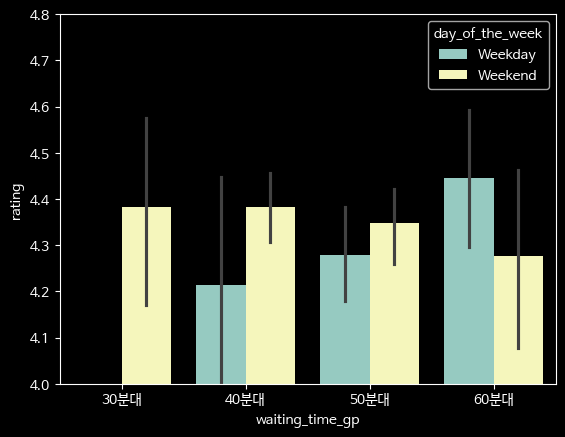

In [ ]:
import seaborn as sns
%matplotlib inline

plt.style.use(['dark_background'])
sns.barplot(x='waiting_time_gp', y='rating', hue='day_of_the_week', data= df1,
              order = ['30분대', '40분대', '50분대', '60분대'])
plt.ylim(4,4.8)

In [ ]:
df1.day_of_the_week.value_counts()

day_of_the_week
Weekend    822
Weekday    340
Name: count, dtype: int64

In [ ]:
print('준비시간 평균:' , df.food_preparation_time.mean())
print('배달시간 평균:' , df.food_preparation_time.mean())

준비시간 평균: 27.371970495258168
배달시간 평균: 27.371970495258168


###결론

재주문률이 높은 음식점의 평점이 전체 평균보다 높으나

재주문률과 배달시간의 관계는 크지 않아보임

---


많은 배달이 50분대에 이루어짐(음식 준비시간 포함)

평점별 배달 시간 분포를 확인하였을 때 배달시간이 고객만족도에 큰 영향을 끼치지는 않지만

주말 배달시간대별 평점을 보았을 때 빠를수록 만족도가 좋은 편이며

특히 60분대에서 큰 폭으로 낮아지는 것을 확인하였다.

30분대로 총 배달시간을 줄이기 위해 노력할 필요는 크게 없어보이며

40분대 배달이 가장 효과적일 것이고

50분대 배달을 마지노선으로 보인다.

---

 따라서 고객만족도를 위해 주말 전략으로

(50분 - 음식 준비시간)의 시간정보를 배달 기사님들께 제공하여

최대한 50분 이내로 맞추어 배달할 수 있도록 장려할 수 있을 것이다.